## Introduction

- For our purposes you should think of probability as a way of quantifying the uncertainty associated with events chosen from some universe of events.
- P(E) to mean “the probability of the event E.”
- We’ll use probability theory to build models, evaluate models and all over the place.

## Dependence and Independence

- We say that two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise, they are independent
> - If we flip a fair coin twice, knowing whether the first flip is heads gives us no information about whether the second flip is heads.
> - If the first flip is heads, then definitely it’s not the case that both flips are tails. These two events are dependent.

- Mathematically, we say that two events E and F are <b>independent</b> if the probability that they both happen is the product of the probabilities that each one happens:
> <h3><b>$$P(E,F) = P(E) P(F)$$</b></h3>

## Conditional Probability

- All probabilities are conditional; whether or not it’s written explicitly

- When two events E and F are not necessarily independent (and if the probability of F is not zero), then define the probability of <b>E "conditional on F"</b> as:
> <h3> <b>$$P(E|F) = \frac{P(E,F)}{P(F)}$$</b></h3>
> <h3> <b>$$P(E,F) = P(E|F) P(F)$$</b></h3>

- Here E is the event whose uncertainty we want to update, and F is the evidence we observe (or want to treat as given). We call P(E) the <b>prior probability</b> of E and P(E|F) the <b>posterior probability</b> of E ("prior" means before updating based on the evidence, and "posterior" means after updating based on the evidence).

- When E and F are <b>independent</b>, you can check that this gives:
> <h3><b>$$P(E|F) = P(E)$$</b></h3>


- <b><h3>Note:</h3></b> For any event A, P(A|A) = P(A,A)/P(A) = 1. Upon observing that A has occurred, our updated probability for A is 1, but this not mean that P(A) != 1

- <b>Example:</b> involves a family with two (unknown) children. If we assume that:
> - Each child is equally likely to be a boy or a girl.
> - The gender of the second child is independent of the gender of the first child.
> - So all possibilities are <b>(GG,GB,BG,BB)</b> each one has $$\frac{1}{4}$$
> - Then the event "no girls" has probability $$\frac{1}{4} -> (BB)$$
> - The event "one girl, one boy" has probability $$\frac{1}{2} -> (GB, BG)$$
> - The event "two girls" has probability $$\frac{1}{4} -> (GG)$$

- Now we can ask what is the probability of the event "both children are girls" (B) conditional on the event "the older child is a girl" (G)? Using the
definition of conditional probability:
> $$P(B|G) = \frac{P(B,G)}{P(G)} = \frac{P(B)}{P(G)} = \frac{1}{2}$$
>> $$P(G) = \frac{1}{2} -> (GG,GB)$$
>> $$P(B,G) = \frac{1}{4} -> (GG)$$
>> $$P(B|G) = \frac{\frac{1}{4}}{\frac{1}{2}} = \frac{1}{2}$$

- We could also ask about the probability of the event "both children are girls" conditional on the event "at least one of the children is a girl" (L).
- The event B and L ("both children are girls and at least one of the children is a girl") is just the event B.
> $$P(B|L) = \frac{P(B,L)}{P(L)} = \frac{P(B)}{P(L)} = \frac{1}{3}$$
>> $$P(L) = \frac{3}{4} -> (GB,BG,GG)$$
>> $$P(B|L) = \frac{1}{4} -> (GG)$$

- We can check this by "generating" a lot of families:

In [5]:
import enum, random

# An Enum is a typed set of enumerated values. We can use them
# to make our code more descriptive and readable.
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## Bayes’s Theorem

- Which is a way of "reversing" conditional probabilities. But we only have information about the probability of F conditional on E occurring. Using the definition of conditional probability twice tells us that:
> $$P(E|F) = \frac{P(E,F)}{P(F)}$$  
>> $$P(E,F) = P(E|F) P(F)$$
>> $$P(F,E) = P(F|E) P(E)$$
>> $$P(E,F) == P(F,E)$$
> <b>So <h3>$$ P(E|F) = \frac{P(F|E)P(E)}{P(F)}$$</h3></b>
> The event F can be split into the two <b>mutually exclusive</b> events "F and E" and "F and not E."
>> $$P(F) = P(F,E) + P(F,¬E)$$ 
>> <b>So <h3>$$ P(E|F)=\frac{P(F|E)P(E)}{P(F|E)P(E) + P(F|¬E)P(¬E)}\$$</h3></b>

- <b>Example:</b> Imagine a certain disease that <b>affects 1 in every 10,000 people</b>. And imagine that there is a test for this disease that gives the <b>correct result ("diseased", "nondiseased") 99%</b> of the time.
- What does a positive test mean? Let’s use <b>T</b> "your test is positive" and <b>D</b> "you have the disease" Then Bayes’s theorem says that <b>the probability that you have the disease, conditional on testing positive</b>, is:

> $$P(D|T) = \frac{P(T|D)P(D)}{P(T|D)P(D)+P(T|¬D)P(¬D)}$$

> $$P(T|D) = 0.99$$
> $$P(D) = \frac{1}{10000} = 0.0001$$
> $$P(T|¬D) = 1-0.99 = 0.01$$
> $$P(¬D) = 1-\frac{1}{10000} = 0.9999$$

> $$P(D|T) = \frac{0.0001*0.99}{(0.0001*0.99)+(0.01*0.9999)} = 0.98\% $$

> That is, <b>less than 1% of the people who test positive actually have the disease.

> - A more intuitive way to see this is to imagine a population of <b>1 million people</b>.
> - You’d <b>expect 100 of them to have the disease</b>, 
> - and <b>99 of those 100 to test positive</b>. 
> - On the other hand, you’d <b>expect 999,900 of them not to have the disease</b>, 
> - and <b>9,999 of those to test positive</b>. 
> - That means you’d <b>expect only 99 out of (99 + 9999) positive testers to actually have the disease</b>

## Random Variables

- Is a variable whose <b>possible values</b> have an <b>associated probability distribution</b>. 
> - A very simple random variable equals 1 if a coin flip turns up heads and 0 if the flip turns up tails. 
- The <b>associated distribution gives the probabilities</b> that the variable realizes each of its possible values. 
> - The coin flip variable equals 0 with probability 0.5 and 1 with probability 0.5.
- Expected value of a random variable, which is the average of its values weighted by their probabilities. 
> - The coin flip variable has an expected value of 1/2 (= 0 * 1/2 + 1 * 1/2)

- Random variables can be <b>conditioned on events</b> just as other events can.
> - The random variable representing the <b>number of girls, X </b><b>[GB,GG,BG,GB]</b>
>> - equals 0 with probability 1/4, 
>> - 1 with probability 1/2, 
>> - and 2 with probability 1/4.
> - We can define a new random variable <b>Y, the number of girls conditional on at least one of the children being a girl</b>. <b>[GB,GG,BG]</b>
>> - equals 1 with probability 2/3 
>> - and 2 with probability 1/3. 
> - And a variable <b>Z, number of girls conditional on the older child being a girl.</b><b>[GB,GG]</b>
>> - equals 1 with probability 1/2 
>> - and 2 with probability 1/2

## Continuous Distributions

- A coin flip corresponds to a <b>discrete distribution</b>—one that associates <b>positive probability with discrete outcomes</b>. (These outcomes will always be real numbers, although that’s not always the case in real life.) 
- For example, the <b>uniform distribution</b> puts equal weight on all the <b>numbers between 0 and 1</b>.

- Because there are infinitely many numbers between 0 and 1, this means that the weight it assigns to individual points must necessarily be zero. For this reason, we represent a continuous distribution with a probability density function (PDF) such that <b>the probability of seeing a value in a certain interval</b> equals the <b>integral of the density function over the interval.</b>

In [3]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

 - We will often be more interested in the <b>cumulative distribution function (CDF)</b>, which gives the probability that a random variable is less than or equal to a certain value

In [4]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:
        return 0 # uniform random is never less than 0
    elif x < 1: 
        return x # e.g. P(X <= 0.4) = 0.4
    else:
        return 1 # uniform random is always less than 1

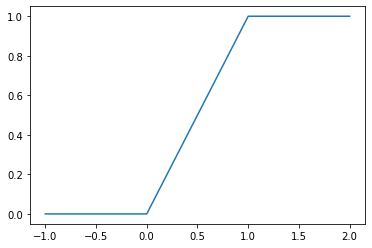

In [146]:
xs = [-1, 0, 1, 2]
plt.plot(xs, [uniform_cdf(x) for x in xs]);

## The Normal Distribution

- Is the classic bell curve–shaped distribution and is completely determined by two parameters: its <b>mean μ (mu)</b> and its <b>standard
deviation σ (sigma)</b>. 
- The mean indicates <b> where the bell is centered</b>, and the standard deviation <b>how "wide" it is</b>.

- It has the <b>PDF</b>:
$$ f(x|μ,σ) = \frac{1}{√2π σ} exp(−\frac{(x − μ)^2}{2σ^2})$$

In [38]:
import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

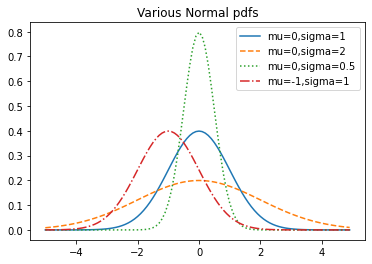

In [39]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

- When <b>μ = 0 and σ = 1</b>, it’s called the <b>standard normal distribution.</b> If <b>Z is a standard normal random variable</b>, then it turns out that:

$$ X = σZ + μ $$

- Conversely, if X is a normal random variable with mean μ and standard deviation σ, is a standard normal variable.

$$ Z = \frac{(X − μ)}{σ} $$

In [19]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

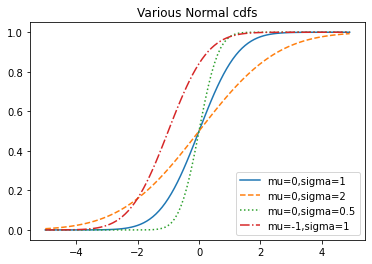

In [20]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

 - Sometimes we’ll need to invert normal_cdf to <b>find the value corresponding to a specified probability</b>. There’s no simple way to compute its inverse, but normal_cdf is continuous and strictly increasing, so we can use a binary search:

In [88]:
def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0  # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0    # normal_cdf(10) is (very close to) 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2  # Consider the midpoint
        mid_p = normal_cdf(mid_z)   # and the CDF's value there
        if mid_p < p:
            low_z = mid_z           # Midpoint too low, search above it
        else:
            hi_z = mid_z            # Midpoint too high, search below it

    return mid_z

- The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to the desired probability.

## The Central Limit Theorem

- One reason the normal distribution is so useful is the central limit theorem, which says (in essence) that a <b>random variable defined as the average of a large number of independent and identically distributed (iid)</b> random variables is itself approximately normally distributed.

- In particular, if x , ..., x are random variables with mean μ and standard deviation σ, and if n is large, then:
- is approximately normally distributed with mean μ and standard deviation
$$ \frac{1}{n}(x_1 + ... + x_n) $$
$$\frac{σ}{√n}$$.

- is approximately normally distributed with mean 0 and standard deviation 1.
$$\frac{(x_1 + ... + x_n) − μ_n}{σ√n}$$

- An easy way to illustrate this is by looking at <b>binomial random variables</b>, which have two parameters n and p. <b>A Binomial(n,p)</b> random variable is simply <b>the sum of n independent Bernoulli(p) random variables</b>, each of which equals 1 with probability p and 0 with probability 1 – p:

In [32]:
import random
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

- <b>Bernoulli(p)</b> $$μ = p$$ <b>$$σ = √p(1 − p)$$</b>.

- The <b>central limit theorem</b> says that
> - <b>as n gets large, a Binomial(n,p) variable is approximately a normal random variable with mean $$μ = np$$ and standard deviation $$σ = √np(1 − p)$$</b>

In [81]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    return xs, ys, histogram

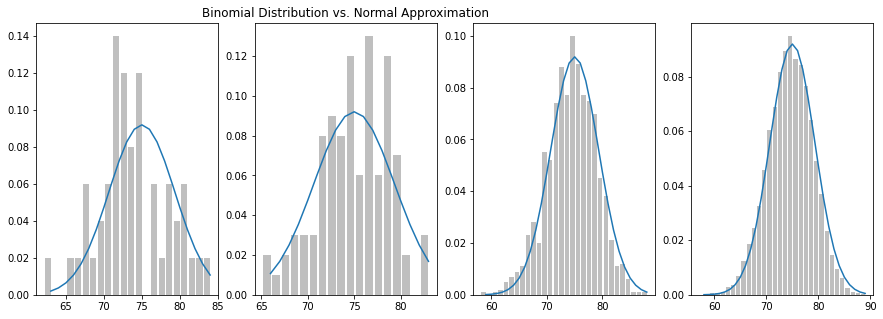

In [126]:
f, axes = plt.subplots(1,4, figsize=(15, 5))
axes[1].set_title("Binomial Distribution vs. Normal Approximation")

i = 0
for s in [50,100,1000,10000]:
    xs, ys, histogram = binomial_histogram(0.75, 100, s)
    axes[i].bar([x - 0.4 for x in histogram.keys()],
            [v / s for v in histogram.values()],
            0.8,
            color='0.75')
    axes[i].plot(xs,ys)
    i+=1
plt.show()

- The moral of this approximation is that if you want to know the probability that (say) a fair coin turns up more than 60 heads in 100 flips, you can estimate it as the probability that a Normal(50,5) is greater than 60, which is easier than computing the Binomial(100,0.5) CDF.